# COMPREHENSIVE ANALYSIS OF THE BRAZIL REAL ESTATE MARKET

### OJECTIVE OF THIS ANALYSIS:
    1. To determine if home size and locaton influences the price of homes in Brazil
    2. The Top 3 most expensive and cheapest real estate market state in Brazil
    3. The most expensive and cheapest real estate market region in Brazil
    4. The Region with highest and Lowest number of Home sales
    5. The State with highest and lowest number of Home sales
    6. Exploring relationship between Home size and price

### PREPARING THE DATA
#### This is where I get to load my data, clean and wrangle to get it ready for analysis and visualization

### Importing Required Libraries and Loading Data.
#### Note there are 2 separate excel sheets to be used which are named data1 & data2

In [38]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

In [39]:
# loading data1 & data2 in the excel workbook
data1 = pd.read_excel(r"C:\Users\ICT\Desktop\Brazil_real_estate_data.xlsx", sheet_name='data1')
data2 = pd.read_excel(r"C:\Users\ICT\Desktop\Brazil_real_estate_data.xlsx", sheet_name='data2')

### Cleaning Data1

In [40]:
# Inpecting data1 with head
data1.head()

,Unnamed: 0,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,187230.85
1,2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,81133.37
2,3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,154465.45
3,4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,146013.20
4,5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,101416.71


In [41]:
# dropping the column "Unnamed: 0"
data1.drop(columns='Unnamed: 0', inplace=True)
data1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,187230.85
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,81133.37
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,154465.45
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,146013.20
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,101416.71


In [42]:
# inspecting data1 using the shape, info and head in pandas
print('the shape of data1 =:', data1.shape)
print('============================')
print(data1.info())

the shape of data1 =: (12834, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  int64  
 5   price_usd                12834 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 601.7+ KB
None


In [43]:
# counting the mumber of NaN values in all the features
data1.isna().sum()

property_type                 0
place_with_parent_names       0
region                        0
lat-lon                    1283
area_m2                       0
price_usd                     0
dtype: int64

In [44]:
# Removing NaN values in data1
data1.dropna(inplace=True)

In [45]:
# Creating 'lat' & 'lon' features from the combined 'lat-lon' feature and converting to float
data1[['lat', 'lon']] = data1['lat-lon'].str.split(',', expand=True).astype('float')
data1[['lat', 'lon']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11551 entries, 0 to 12833
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     11551 non-null  float64
 1   lon     11551 non-null  float64
dtypes: float64(2)
memory usage: 270.7 KB


In [46]:
# Removing "lat-lon" feature
data1.drop(columns="lat-lon", inplace=True)
data1.head()

,property_type,place_with_parent_names,region,area_m2,price_usd,lat,lon
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,110,187230.85,-9.644305,-35.708814
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,65,81133.37,-9.643093,-35.704840
2,house,|Brasil|Alagoas|Maceió|,Northeast,211,154465.45,-9.622703,-35.729795
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,99,146013.20,-9.622837,-35.719556
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,55,101416.71,-9.654955,-35.700227


In [47]:
data1['state'] = data1['place_with_parent_names'].str.split('|', expand=True)[2]
data1['state'].head()

0    Alagoas
1    Alagoas
2    Alagoas
3    Alagoas
4    Alagoas
Name: state, dtype: object

In [48]:
# Removing "place_with_parent_names" feature
data1.drop(columns='place_with_parent_names', inplace=True)
data1.head()

,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,Northeast,65,81133.37,-9.643093,-35.704840,Alagoas
2,house,Northeast,211,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,Northeast,99,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,Northeast,55,101416.71,-9.654955,-35.700227,Alagoas


### Cleaning Data2

In [49]:
# Inpsecting data2 head
data2.head()

,Unnamed: 0,property_type,state,region,lat,lon,area_m2,price_brl
0,1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [50]:
# dropping the column "Unnamed: 0"
data2.drop(columns='Unnamed: 0', inplace=True)
data2.head()

,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [51]:
# inspecting data1 using the shape, info and head in pandas
print('the shape of data2 =:', data2.shape)
print('============================')
print(data2.info())

the shape of data2 =: (12833, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  12833 non-null  object 
 1   state          12833 non-null  object 
 2   region         12833 non-null  object 
 3   lat            12833 non-null  float64
 4   lon            12833 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      12833 non-null  float64
dtypes: float64(4), object(3)
memory usage: 701.9+ KB
None


In [52]:
# counting the mumber of NaN values in all the features
data2.isna().sum()

property_type       0
state               0
region              0
lat                 0
lon                 0
area_m2          1540
price_brl           0
dtype: int64

In [53]:
# Removing NaN values in data2
data2.dropna(inplace=True)

In [54]:
# Create "price_usd" from 'price_brl' with an exchange rate of 3.19BRL/USD
data2['price_usd'] = (data2['price_brl'] / 3.19)
data2['price_usd'].head()

0    129850.463950
1    265958.786834
2     93867.799373
3    265958.786834
4    145495.097179
Name: price_usd, dtype: float64

In [55]:
# Removing "price_brl" feature as it is no longer required
data2.drop(columns='price_brl', inplace=True)
data2.head()

,property_type,state,region,lat,lon,area_m2,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.097179


In [56]:
# Rounding up the prices to 2 decimal places to match with the format of price in data1
data2['price_usd'] = data2['price_usd'].round(2)
data2.head()

,property_type,state,region,lat,lon,area_m2,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.46
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.79
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.80
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.79
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.10


In [57]:
# Concatenate data1 & data2 to a single df
df = pd.concat([data1, data2])
print('df shape is: ', df.shape)

df shape is:  (22844, 7)


### EXPLORING THE DATA
#### This is where I get to feel my data by summarizing its main characteristics using descriptive stattistics and data visualization. A good way to plan EDA is by looking at each column and asking myself questions what it says about my data

In [58]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22844 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  22844 non-null  object 
 1   region         22844 non-null  object 
 2   area_m2        22844 non-null  float64
 3   price_usd      22844 non-null  float64
 4   lat            22844 non-null  float64
 5   lon            22844 non-null  float64
 6   state          22844 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.4+ MB
None


,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110.0,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,Northeast,65.0,81133.37,-9.643093,-35.704840,Alagoas
2,house,Northeast,211.0,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,Northeast,99.0,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,Northeast,55.0,101416.71,-9.654955,-35.700227,Alagoas


### Location Data: "lat" and "lon"

They say that the most important thing in real estate is location, and we can see where where in Mexico our houses are located by using the "lat" and "lon" columns. Since latitude and longitude are based on a coordinate system, a good way to visualize them is to create a scatter plot on top of a map. A great tool for this is the scatter_mapbox from the plotly library.

In [59]:
# create a scatter plot on top of a map by using the "lat" and "lon" columns
fig = px.scatter_mapbox(
    df,  # DataFrame
    lat='lat',
    lon='lon',
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

### Categorical Data: "region"

In [60]:
# Count of number of states
df['region'].nunique()

5

In [61]:
# Count of number of properties per region
df['region'].value_counts()

Southeast       8533
South           7821
Northeast       4794
Central-West    1387
North            309
Name: region, dtype: int64

### Categorical Data: "state"

In [62]:
# Count of number of states
df['state'].nunique()

25

In [63]:
# Count of number of properties in each state
df['state'].value_counts()

Minas Gerais           2680
São Paulo              2656
Rio Grande do Sul      2643
Rio de Janeiro         2642
Santa Catarina         2634
Paraná                 2544
Bahia                  2045
Ceará                  1574
Distrito Federal        732
Espírito Santo          555
Goiás                   555
Pernambuco              406
Rio Grande do Norte     302
Pará                    299
Paraíba                 250
Maranhão                101
Mato Grosso              86
Sergipe                  68
Alagoas                  24
Piauí                    24
Mato Grosso do Sul       14
Rondônia                  5
Amazonas                  3
Amapá                     1
Tocantins                 1
Name: state, dtype: int64

In [64]:
df_state_prop = df['state'].value_counts().head()
df_state_prop

Minas Gerais         2680
São Paulo            2656
Rio Grande do Sul    2643
Rio de Janeiro       2642
Santa Catarina       2634
Name: state, dtype: int64

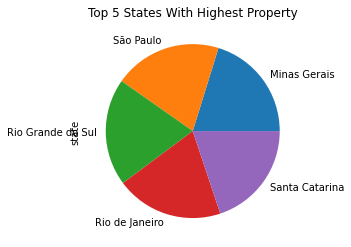

In [65]:
# Plotting a piechart of top 5 states with number of properties
df_state_prop.plot(
    kind='pie',
    title='Top 5 States With Highest Property'
);

### Numerical Value_Count: "area_m2" and "price_usd"
#### This tells how much the houses/apartment cost and how big they are. Descriptive statistics will help answer this

In [66]:
# Getting a descriptive statistics of "area_m2" and "price_usd" features
df[["area_m2", "price_usd"]].describe().round(2)

,area_m2,price_usd
count,22844.00,22844.00
mean,115.02,194987.32
std,47.74,103617.68
min,53.00,74892.34
25%,76.00,113898.77
50%,103.00,165697.56
75%,142.00,246900.88
max,252.00,525659.72


area_m2: the mean is larger than the median (50th percentile). Both statistics are supposed to give an idea of the typical value for the area_m2 feature. So why is there a difference of 12 m2 between them. To answer this question, I need to see how house sizes are distributed in the dataset. I will be using histogram and boxplot to visualize the disstribution

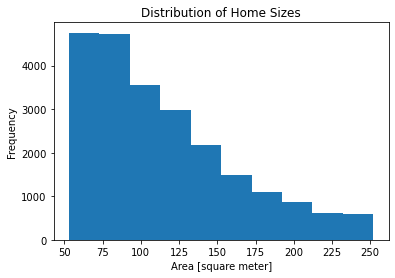

In [67]:
# Using histogram to check the distribution of home sizes
plt.hist(df['area_m2'])
plt.xlabel('Area [square meter]')
plt.ylabel('Frequency')
plt.title('Distribution of Home Sizes');

The distribution above is skewed to the right. Meaning that smaller homes between 50m2 - 125m2 are more (over 2,000 homes) while bigger homes between 150m2 - 250m2 are less than 2,000 homes. Hence the difference in the mean and median values

Using the same 2 visualization tools (histogram and boxplot) to find out if "price_usd" have the same distribution as "area_m2"

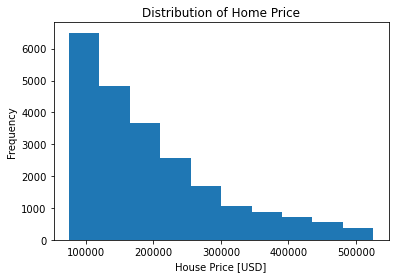

In [68]:
# Using histogram to check the distribution of home prices
plt.hist(df['price_usd'])
plt.xlabel('House Price [USD]')
plt.ylabel('Frequency')
plt.title('Distribution of Home Price');

The distribution of home price is also skewed to the right as home prices of USD100,000 - USD200,000  are more (over 2,000 homes) while homes around USD300,000 - USD500,000 are less than 2,000 homes. This is help in explaining the difference betweent he mean and median values

### ANALYSING THE DATA
##### In this analysis stage, I will be asking series of research questions and providing the answers with insights gotten from the data

## Research Question 1
#### Which state has the most expensive real estate market?

Do housing prices vary by state? If so what are the most expensive and cheapest state for purchasing a home? During the exploratory data analysis, I used descriptive statistics like mean and median to get an idea of the typical house price in Brazil. Now I need to break that calculation down by state and visualize the results

I already know in which state each house is located thansk to the "state" column. Next step is to divide the dataset into groups (one per state) and calculate the mean house price for each group.

In [69]:
# Grouping state by mean price
mean_price_by_state = (
    df
    .groupby('state')
    ['price_usd'].mean()
    .sort_values(ascending=False)
    .round(2)
)
mean_price_by_state

state
Santa Catarina         227570.74
Rio de Janeiro         225106.54
Pernambuco             217153.05
São Paulo              213903.56
Minas Gerais           200534.60
Ceará                  192614.28
Distrito Federal       186818.84
Pará                   183217.82
Bahia                  183215.88
Alagoas                180356.56
Rio Grande do Sul      174498.18
Goiás                  171347.39
Maranhão               167956.09
Paraná                 164168.84
Mato Grosso            163711.91
Rio Grande do Norte    161747.31
Paraíba                157509.77
Piauí                  154192.25
Espírito Santo         149688.86
Amazonas               148744.51
Amapá                  148349.22
Sergipe                142418.03
Mato Grosso do Sul     127473.48
Rondônia               111403.62
Tocantins               90738.87
Name: price_usd, dtype: float64

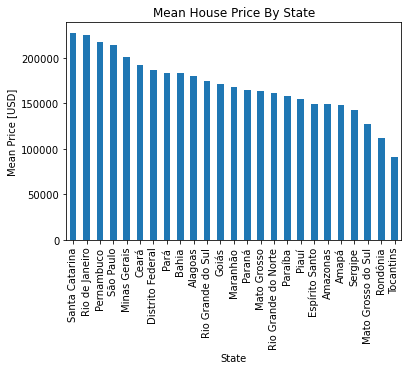

In [70]:
# visualizing mean price by state
mean_price_by_state.plot(
    kind='bar',
    xlabel='State',
    ylabel='Mean Price [USD]',
    title='Mean House Price By State'
);

It looks strange that Santa Catarina would be the most expensive real estate market in Brazil when according to https://www.statista.com/statistics/1337639/gdp-brazil-by-state/ it is number 6 in the top large economy state.
A better metric to use is price per m2. In order to do that, I need to create 'price_m2' column.

In [71]:
# creating a new column "price_m2" by diving "price_usd" by "area_m2"
df['price_m2'] = (df['price_usd'] / df['area_m2']).round(2)
df['price_m2'].head()

0    1702.10
1    1248.21
2     732.06
3    1474.88
4    1843.94
Name: price_m2, dtype: float64

In [72]:
# Grouping state by mean price per m2
mean_price_m2_by_state = (
    df
    .groupby('state')
    ['price_m2'].mean()
    .round(2)
    .sort_values(ascending=False)
)
mean_price_m2_by_state

state
Rio de Janeiro         2234.87
São Paulo              1989.02
Santa Catarina         1887.70
Distrito Federal       1806.20
Pernambuco             1796.25
Minas Gerais           1762.10
Ceará                  1709.02
Rio Grande do Sul      1691.48
Pará                   1627.28
Amapá                  1595.15
Bahia                  1547.97
Paraíba                1511.35
Maranhão               1483.71
Paraná                 1477.41
Alagoas                1455.24
Piauí                  1454.33
Espírito Santo         1441.95
Goiás                  1408.93
Amazonas               1395.61
Sergipe                1353.66
Rio Grande do Norte    1325.17
Tocantins              1296.27
Mato Grosso            1212.77
Rondônia                995.10
Mato Grosso do Sul      993.30
Name: price_m2, dtype: float64

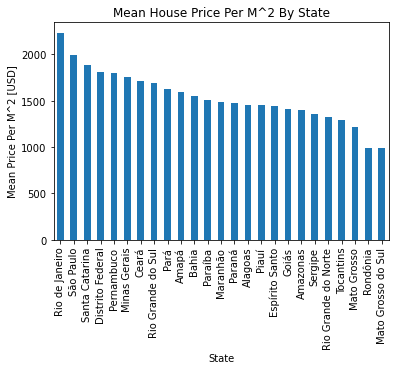

In [73]:
# Visualizing mean price per m2 by state
mean_price_m2_by_state.plot(
    kind='bar',
    xlabel='State',
    ylabel='Mean Price Per M^2 [USD]',
    title='Mean House Price Per M^2 By State'
);

Notice that "Rio de Janeiro" is by far the most expensive real estate martket in Brazil followed by "Sao Paulo. Many of the top 10 states are also in the top 10 most expensive real estate markets. So it looks like this bar chart is a more accurate reflection of state real estate markets. 

In [121]:
# Extracting top 3 state with highest average home price
top_3_state = mean_price_m2_by_state.head(3)
top_3_state

state
Rio de Janeiro    2234.87
São Paulo         1989.02
Santa Catarina    1887.70
Name: price_m2, dtype: float64

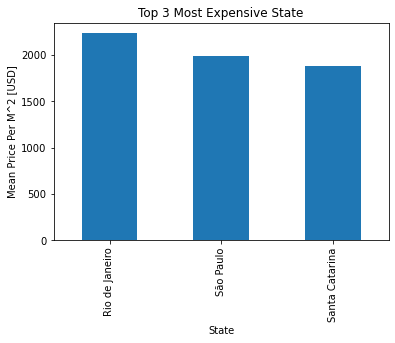

In [125]:
# Visualizing top 3 most expensive state
top_3_state.plot(
    kind='bar',
    xlabel='State',
    ylabel='Mean Price Per M^2 [USD]',
    title='Top 3 Most Expensive State'
);

In [122]:
# Extracting bottom 3 state with cheapest average home price
bottom_3_state = mean_price_m2_by_state.tail(3)
bottom_3_state

state
Mato Grosso           1212.77
Rondônia               995.10
Mato Grosso do Sul     993.30
Name: price_m2, dtype: float64

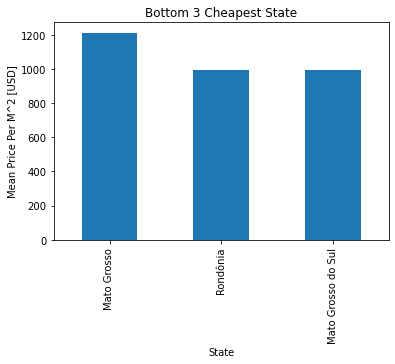

In [126]:
# Visualizing bottom 3 Cheapest state
bottom_3_state.plot(
    kind='bar',
    xlabel='State',
    ylabel='Mean Price Per M^2 [USD]',
    title='Bottom 3 Cheapest State'
);

## Research Question 2
#### Which Region has the most expensive real estate market?

In [74]:
# Grouping region by mean price
mean_price_by_region = (
    df
    .groupby('region')
    ['price_usd'].mean()
    .sort_values(ascending=False)
    .round(2)
)
mean_price_by_region

region
Southeast       208996.76
South           189012.35
Northeast       185422.99
North           181308.96
Central-West    178596.28
Name: price_usd, dtype: float64

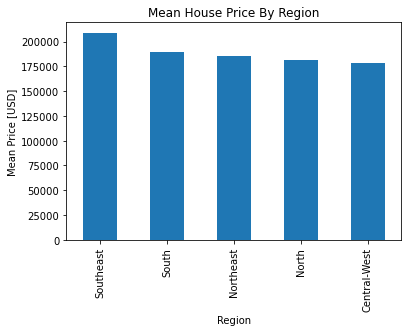

In [75]:
# visualizing mean price by region
mean_price_by_region.plot(
    kind='bar',
    xlabel='Region',
    ylabel='Mean Price [USD]',
    title='Mean House Price By Region'
);

Southeast region is the most expensive real estate market in Brazil with a mean price of USD208,997, followed by South region with USD189,012 while Central-West is the cheapest with USD178,596

#### Which Region has the highest number of property

In [76]:
# Count of number of properties per region
region_count = df['region'].value_counts()
region_count

Southeast       8533
South           7821
Northeast       4794
Central-West    1387
North            309
Name: region, dtype: int64

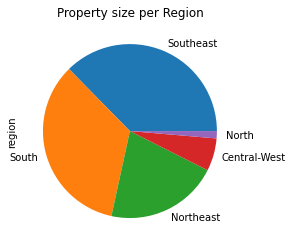

In [77]:
region_count.plot(
    kind='pie',
    title='Property size per Region'
);

Although North region has the least number of Homes in Brazil, it is not the region with the cheapest real estate market, rather is it Central-West as visualized above

## Research Question 3
#### Which State in each Region has the most expensive real estate market?

#### Southeast Region

In [78]:
# subset of homes in the southeast region
df_southeast = df[df['region'] == 'Southeast']
df_southeast.head()

,property_type,region,area_m2,price_usd,lat,lon,state,price_m2
4853,apartment,Southeast,62.0,82069.52,-20.281525,-40.291878,Espírito Santo,1323.70
4854,apartment,Southeast,128.0,210634.71,-20.286342,-40.298077,Espírito Santo,1645.58
4855,apartment,Southeast,61.0,107657.74,-20.263918,-40.266335,Espírito Santo,1764.88
4856,apartment,Southeast,140.0,78012.85,-20.319550,-40.325343,Espírito Santo,557.23
4857,apartment,Southeast,210.0,296448.85,-20.299933,-40.298103,Espírito Santo,1411.66


In [79]:
# Average home price/m2 of states in the Southeast region
mean_price_by_SE = df_southeast.groupby('state')['price_m2'].mean().sort_values(ascending=False).round(2)
mean_price_by_SE

state
Rio de Janeiro    2234.87
São Paulo         1989.02
Minas Gerais      1762.10
Espírito Santo    1441.95
Name: price_m2, dtype: float64

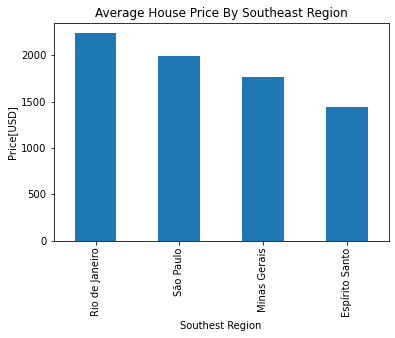

In [115]:
# visualizing price of homes in the southeast region
mean_price_by_SE.plot(
    kind='bar',
    xlabel='Southest Region',
    ylabel='Price[USD]',
    title='Average House Price By Southeast Region'
);

It is clear that homes in "Rio de janeiro" are the most expensive in the Southeast Region while homes in "Espirito Santo" are the cheapest in the Region as per the above chart

#### South Region

In [98]:
# subset of homes in the south region
df_south = df[df['region'] == 'South']
df_south.head()

,property_type,region,area_m2,price_usd,lat,lon,state,price_m2
9304,apartment,South,127.0,296448.85,-25.455704,-49.292918,Paraná,2334.24
9305,apartment,South,104.0,219996.25,-25.455704,-49.292918,Paraná,2115.35
9306,apartment,South,100.0,194210.50,-25.460236,-49.293812,Paraná,1942.10
9307,apartment,South,77.0,149252.94,-25.460236,-49.293812,Paraná,1938.35
9308,apartment,South,73.0,144167.75,-25.460236,-49.293812,Paraná,1974.90


In [99]:
# Average home price/m2 of states in the South region
mean_price_by_S = df_south.groupby('state')['price_m2'].mean().sort_values(ascending=False).round(2)
mean_price_by_S

state
Santa Catarina       1887.70
Rio Grande do Sul    1691.48
Paraná               1477.41
Name: price_m2, dtype: float64

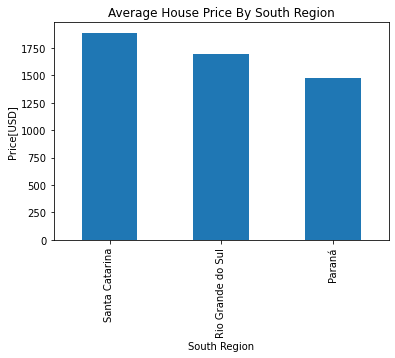

In [116]:
# visualizing price of homes in the South Region
mean_price_by_S.plot(
    kind='bar',
    xlabel='South Region',
    ylabel='Price[USD]',
    title='Average House Price By South Region'
);

You will notice that homes in "Santa Catarina" are the most expensive in the South Region of Brazil while homes in "Parana" are the cheapest in the Region as per the above chart

#### Northeast Region

In [101]:
df_northeast = df[df['region'] == 'Northeast']
df_northeast.head()

,property_type,region,area_m2,price_usd,lat,lon,state,price_m2
0,apartment,Northeast,110.0,187230.85,-9.644305,-35.708814,Alagoas,1702.10
1,apartment,Northeast,65.0,81133.37,-9.643093,-35.704840,Alagoas,1248.21
2,house,Northeast,211.0,154465.45,-9.622703,-35.729795,Alagoas,732.06
3,apartment,Northeast,99.0,146013.20,-9.622837,-35.719556,Alagoas,1474.88
4,apartment,Northeast,55.0,101416.71,-9.654955,-35.700227,Alagoas,1843.94


In [102]:
mean_price_by_NE = df_northeast.groupby('state')['price_m2'].mean().sort_values(ascending=False).round(2)
mean_price_by_NE

state
Pernambuco             1796.25
Ceará                  1709.02
Bahia                  1547.97
Paraíba                1511.35
Maranhão               1483.71
Alagoas                1455.24
Piauí                  1454.33
Sergipe                1353.66
Rio Grande do Norte    1325.17
Name: price_m2, dtype: float64

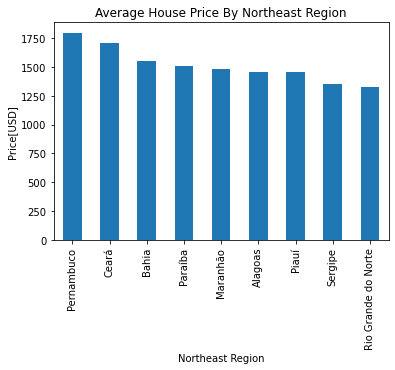

In [117]:
mean_price_by_NE.plot(
    kind='bar',
    xlabel='Northeast Region',
    ylabel='Price[USD]',
    title='Average House Price By Northeast Region'
);

In the Northeast Region of Brazil, homes in "Pemambuco" are the most expensive whereas homes in "Rio Grande Norte" are the cheapest as per the above chart

#### Central-West Region

In [105]:
df_centralwest = df[df['region'] == 'Central-West']
df_centralwest.head()

,property_type,region,area_m2,price_usd,lat,lon,state,price_m2
4051,apartment,Central-West,181.0,425241.46,-15.794229,-47.882166,Distrito Federal,2349.40
4052,apartment,Central-West,96.0,287197.77,-15.750695,-47.910943,Distrito Federal,2991.64
4054,apartment,Central-West,87.0,215909.34,-15.794229,-47.882166,Distrito Federal,2481.72
4055,apartment,Central-West,67.0,186225.61,-15.794229,-47.882166,Distrito Federal,2779.49
4056,apartment,Central-West,73.0,230414.74,-15.750695,-47.910943,Distrito Federal,3156.37


In [106]:
mean_price_by_CW = df_centralwest.groupby('state')['price_m2'].mean().sort_values(ascending=False).round(2)
mean_price_by_CW

state
Distrito Federal      1806.20
Goiás                 1408.93
Mato Grosso           1212.77
Mato Grosso do Sul     993.30
Name: price_m2, dtype: float64

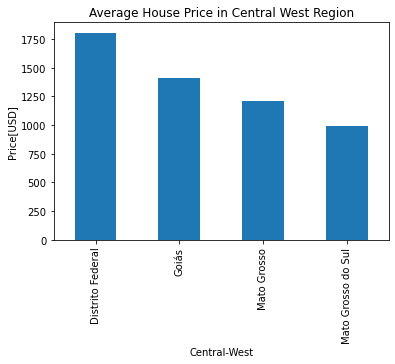

In [119]:
mean_price_by_CW.plot(
    kind='bar',
    xlabel='Central-West',
    ylabel='Price[USD]',
    title='Average House Price in Central West Region'
);

In the Central-West Region of Brazil, homes in "Distrito Federal" are the most expensive while homes in "Mato Grosso do Sul" are the cheapest as per the above chart

#### North Region

In [108]:
df_north = df[df['region'] == 'North']
df_north.head()

,property_type,region,area_m2,price_usd,lat,lon,state,price_m2
27,apartment,North,93.0,148349.22,0.020423,-51.069578,Amapá,1595.15
28,apartment,North,117.0,249641.14,-3.097695,-60.057747,Amazonas,2133.68
29,house,North,110.0,118579.54,-3.078233,-60.004742,Amazonas,1078.00
30,house,North,80.0,78012.85,-3.047664,-59.999931,Amazonas,975.16
12399,house,North,110.0,109217.99,-1.345734,-48.387386,Pará,992.89


In [109]:
mean_price_by_N = df_north.groupby('state')['price_m2'].mean().sort_values(ascending=False).round(2)
mean_price_by_N

state
Pará         1627.28
Amapá        1595.15
Amazonas     1395.61
Tocantins    1296.27
Rondônia      995.10
Name: price_m2, dtype: float64

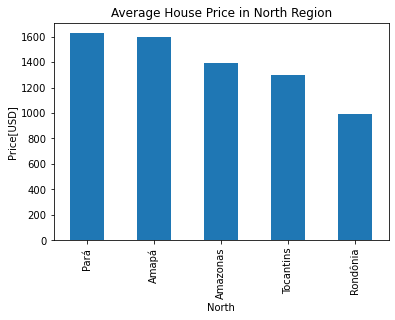

In [120]:
mean_price_by_N.plot(
    kind='bar',
    xlabel='North',
    ylabel='Price[USD]',
    title='Average House Price in North Region'
);

In the North Region of Brazil, homes in "Para" are the most expensive whereas homes in "Rononia" are the cheapest as per the above chart

## Research Question 4
#### Is there a relationship between home size and price?

From the previous question, I know that the location of a home affects its price (especially if it is in Rio de Janeiro) but does the size of a home influence the price?

A scatter plot can be helpful when evaluating the relationship between 2 columns as it lets you see if 2 variables are correlated - in this case if an increase in home size is associated with an increase in price

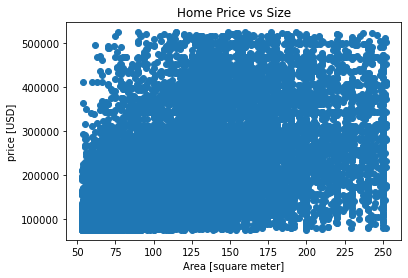

In [81]:
# Visulization the relationship of home size and price using a scatter plot
plt.scatter(x=df['area_m2'], y=df['price_usd'])
plt.xlabel('Area [square meter]')
plt.ylabel('price [USD]')
plt.title('Home Price vs Size');

There seems to be a positive correlation which means the bigger the house, the higher the price. But how can this correlation be quantified.
By using corr method, the correlation coefficient of "area_m2" and "price_usd" variables can be calculated

In [82]:
# calculating the correlation coefficient
df['area_m2'].corr(df['price_usd'])

0.5310399664539838

The correlation coefficient is over 0.5. This means there is a moderate relatinship between house size and price in Brazil. But does this relationship hold true for every state?
Let me explore further by taking a look at a couple of states starting with Parana.

In [83]:
# Creating a sub df df_parana containing only homes in Parana
df_parana = df[df['state'] == 'Paraná']
df_parana.head()

,property_type,region,area_m2,price_usd,lat,lon,state,price_m2
9304,apartment,South,127.0,296448.85,-25.455704,-49.292918,Paraná,2334.24
9305,apartment,South,104.0,219996.25,-25.455704,-49.292918,Paraná,2115.35
9306,apartment,South,100.0,194210.50,-25.460236,-49.293812,Paraná,1942.10
9307,apartment,South,77.0,149252.94,-25.460236,-49.293812,Paraná,1938.35
9308,apartment,South,73.0,144167.75,-25.460236,-49.293812,Paraná,1974.90


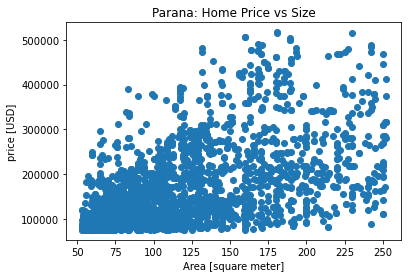

In [84]:
# Visulization the relationship of home size and price in Paraná using a scatter plot
plt.scatter(x=df_parana['area_m2'], y=df_parana['price_usd'])
plt.xlabel('Area [square meter]')
plt.ylabel('price [USD]')
plt.title('Parana: Home Price vs Size');

In [85]:
df_parana['area_m2'].corr(df_parana['price_usd'])

0.5436659935502657

There seems to be a positive correlation between size and price of homes in the state of Paraná as observed earlier

In [86]:
# Creating a subdata df_Bahia containing only homes in Bahia
df_Bahia = df[df['state'] == 'Bahia']
df_Bahia.head()

,property_type,region,area_m2,price_usd,lat,lon,state,price_m2
32,house,Northeast,138.0,93615.42,-12.977729,-38.50930,Bahia,678.37
34,house,Northeast,202.0,154465.45,-12.852844,-38.32711,Bahia,764.68
35,apartment,Northeast,120.0,87374.39,-12.993305,-38.45739,Bahia,728.12
36,house,Northeast,202.0,154465.45,-12.852844,-38.32711,Bahia,764.68
37,apartment,Northeast,82.0,87374.39,-12.993305,-38.45739,Bahia,1065.54


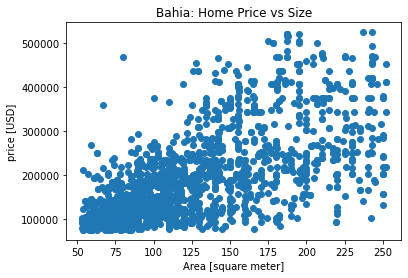

In [87]:
# Visulization the relationship of home size and price in Bahia using a scatter plot
plt.scatter(x=df_Bahia['area_m2'], y=df_Bahia['price_usd'])
plt.xlabel('Area [square meter]')
plt.ylabel('price [USD]')
plt.title('Bahia: Home Price vs Size');

In [88]:
df_Bahia['area_m2'].corr(df_Bahia['price_usd'])

0.6789537593555454

In [89]:
# Creating a subdata df_Pernambuco containing only homes in Pernambuco
df_Pernambuco = df[df['state'] == 'Pernambuco']
df_Pernambuco.head()

,property_type,region,area_m2,price_usd,lat,lon,state,price_m2
12733,house,Northeast,215.0,265243.71,-8.398109,-35.060985,Pernambuco,1233.69
12734,house,Northeast,165.0,327653.99,-8.398109,-35.060985,Pernambuco,1985.78
12735,house,Northeast,235.0,405666.85,-8.398109,-35.060985,Pernambuco,1726.24
12736,house,Northeast,230.0,277725.76,-8.398109,-35.060985,Pernambuco,1207.50
12737,house,Northeast,150.0,265243.71,-8.558203,-35.011074,Pernambuco,1768.29


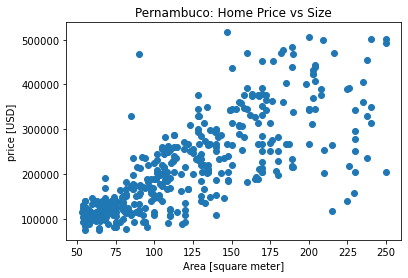

In [90]:
# Visulization the relationship of home size and price in Pernambuco using a scatter plot
plt.scatter(x=df_Pernambuco['area_m2'], y=df_Pernambuco['price_usd'])
plt.xlabel('Area [square meter]')
plt.ylabel('price [USD]')
plt.title('Pernambuco: Home Price vs Size');

In [91]:
df_Pernambuco['area_m2'].corr(df_Pernambuco['price_usd'])

0.7542152453679098

In conclusion, there is a positive relationship between home size and price in Brazil real estate market. This means the bigger the home size, the higher the price and vice versa.

In [ ]:
average price of property type to know which is more expensive between houses and apartments
count of property type